In [ ]:
import pandas as pd
import numpy as np
from google.colab import files 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk  #natural language toolkit library
!pip install nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud   #higlights the important words
from sklearn.feature_extraction.text import CountVectorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
file = files.upload()

Saving spam.csv to spam.csv


In [ ]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")


In [ ]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2521,ham,"Sorry, I'll call later",NaN,NaN,NaN
2688,ham,Yes I know the cheesy songs from frosty the sn...,NaN,NaN,NaN
2246,spam,Hi ya babe x u 4goten bout me?' scammers getti...,NaN,NaN,NaN
3747,ham,"A bit of Ur smile is my hppnss, a drop of Ur t...",NaN,NaN,NaN
76,ham,Thats cool. i am a gentleman and will treat yo...,NaN,NaN,NaN
957,ham,Welp apparently he retired,NaN,NaN,NaN
4467,ham,Much better now thanks lol,NaN,NaN,NaN
1827,ham,Hey gorgeous man. My work mobile number is. Ha...,NaN,NaN,NaN
436,ham,"Ask g or iouri, I've told the story like ten t...",NaN,NaN,NaN
859,ham,Did he just say somebody is named tampa,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

Steps:

1. data cleaning
2. eda
3. text preprocessing
4. model building
5. evaluation
6. improvement
7. website
8. deployment


In [ ]:
# Data Cleaning

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#since there are very less values in unnamed-2,3,4 and most of them are missing, so we can drop them.

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
1199,ham,NEFT Transaction with reference number &lt;#&...
3308,ham,Okie Ì_ wan meet at bishan? Cos me at bishan n...
848,ham,Yeah there's barely enough room for the two of...
946,spam,Ur cash-balance is currently 500 pounds - to m...
2448,ham,Do u knw dis no. &lt;#&gt; ?


In [ ]:
#renaming the columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1249,ham,"I call you later, don't have network. If urgnt..."
1113,ham,"No I'm good for the movie, is it ok if I leave..."
1573,spam,SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...
2218,ham,Nice talking to you! please dont forget my pix...
3500,ham,says the &lt;#&gt; year old with a man and m...


In [ ]:
#encoding the target variables, ham:0 and spam:1

encoder = LabelEncoder()
df['target']= encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#checking for missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#checking for duplicate values and removing them

df.duplicated().sum()

df = df.drop_duplicates(keep='first')      #keeps only the first occurance

In [ ]:
df.shape

(5169, 2)

In [ ]:
#EDA

df['target'].value_counts()     # 0=ham , 1=spam

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7fbd98c646a0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

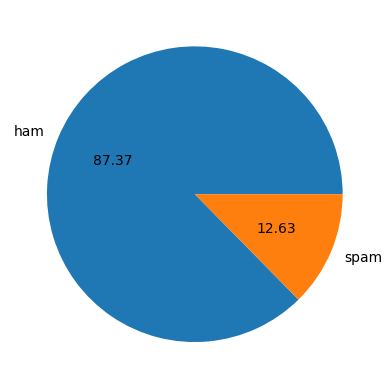

In [ ]:
plt.pie(df['target'].value_counts() , labels = ['ham','spam'], autopct="%0.2f")

**Inference:** We can see that the data is **IMBALANCED**, percentage of ham is much much greater than spam.

In [ ]:
#for analysis of the texts, creating 3 columns , containing number of characters, words and sentences in the sms

nltk.download('punkt')  # divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#fetching the number of characters in each text

df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#fetching the number of words in each text

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#fetching number of sentences

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#describing ham

df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#describing spam

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

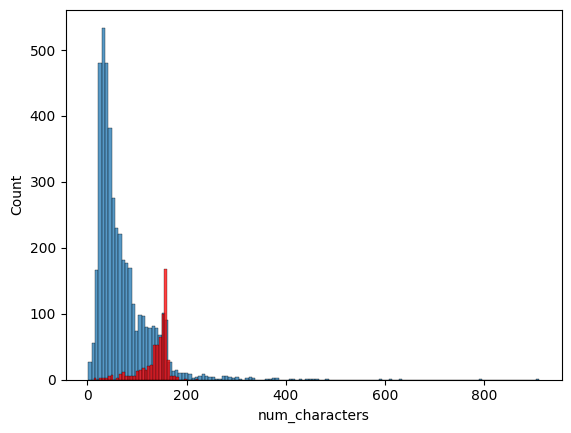

In [ ]:
#plotting for ham and spam

sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'] , color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

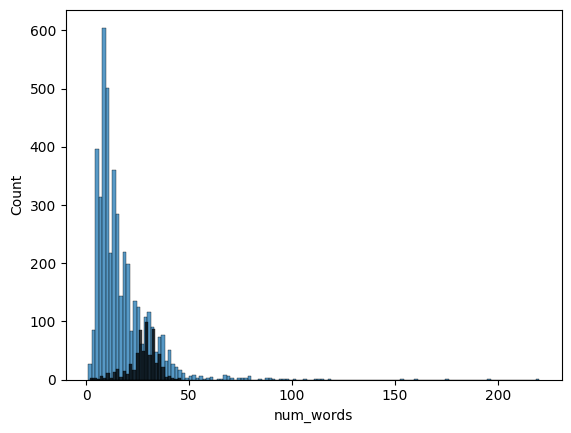

In [ ]:

sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'] , color = 'black')

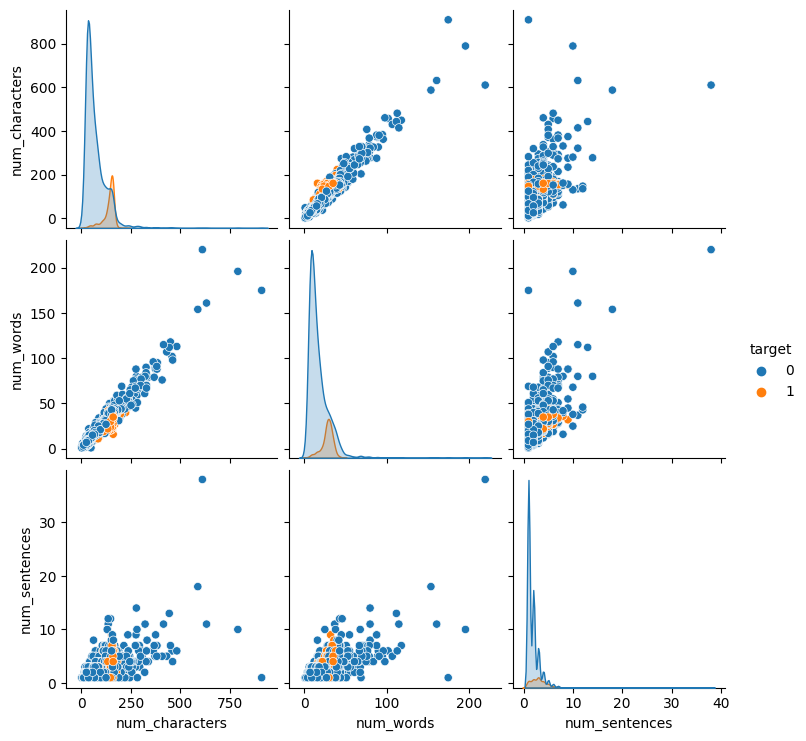

In [ ]:
sns.pairplot(df,hue = 'target')

<ipython-input-30-810128502dda>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

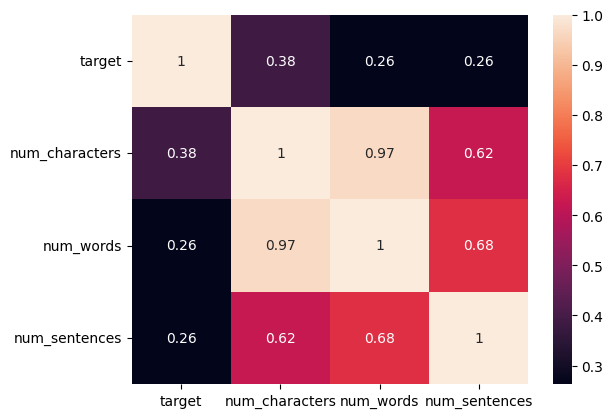

In [ ]:
#correlation coefficient

sns.heatmap(df.corr(),annot=True)

 **Inference**: We see that there is high correlation between the three columns, so we can only keep only column for our model, for that we can select num_characters because it has the highest relation with the target variable of 0.38

In [ ]:
#data preprocssing

'''
1. lower case
2. tokenization
3. removing special characters
4. removing stop words and punctuation
5. stemming (merging all same meaning words to a single word)
'''

'\n1. lower case\n2. tokenization\n3. removing special characters\n4. removing stop words and punctuation\n5. stemming (merging all same meaning words to a single word)\n'

In [ ]:
#creating a function to make all lowercase, word takenization and removing special characters


def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  
  text = y[:]
  y.clear()
  
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y) 


In [ ]:
ps = PorterStemmer()


In [ ]:
#checking the working of function

import nltk
nltk.download('stopwords')

transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
#creating a new column for transformed text

df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#creating a word cloud for ham and spam

wc = WordCloud(width = 500, height = 500 , min_font_size=10 , background_color = 'white')

In [ ]:
#ham

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))          #concatenating the string with space

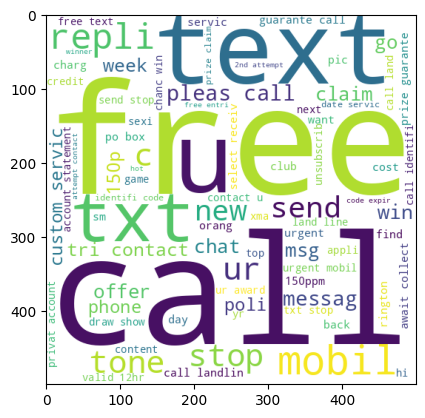

In [ ]:
plt.imshow(spam_wc)

In [ ]:
#spam

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))          #concatenating the string with space

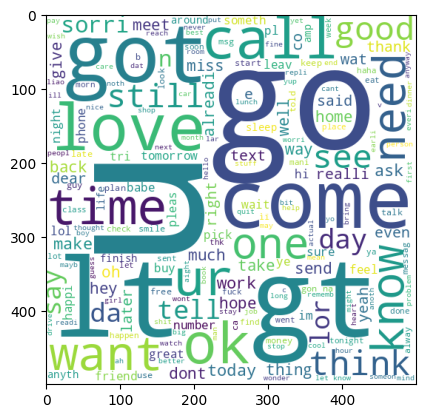

In [ ]:
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#list of spam texts

spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
  

In [ ]:
len(spam_corpus)

9939

In [ ]:
#getting the most used words

from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))



,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [ ]:
#model building

from sklearn.feature_extraction.text import TfidfVectorizer 
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
#for Gaussian Naive Bayes

gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
#for Multinomial Naive Bayes

mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
#for Bernoulli Naive Bayes

bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


**Inference:** As compared to count vectorizer when we used Tfidf vectorizer, the precision of multinomial naive bayes improved and it is not making any false positive. Thus we can select multinomial naive bayes out of these.

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf , open('Vectorizer.pkl','wb'))
pickle.dump(mnb , open('model.pkl','wb'))